# Распознавание рукописных цифр при помощи полносвязной нейронной сети

In [32]:
import torch
import random
import numpy as np

random.seed(0)
np.random.seed(0)
torch.manual_seed(0)
torch.cuda.manual_seed(0)
torch.backends.cudnn.deterministic = True

Загрузим набор данных MNIST:

In [33]:
import torchvision.datasets
MNIST_train = torchvision.datasets.MNIST('./', download=True, train=True)
MNIST_test = torchvision.datasets.MNIST('./', download=True, train=False)

Разделим данные на тестовые и тренировочные множества:

In [34]:
X_train = MNIST_train.train_data
y_train = MNIST_train.train_labels
X_test = MNIST_test.test_data
y_test = MNIST_test.test_labels

Посмотрим на тип данных:

In [35]:
X_train.dtype, y_train.dtype

(torch.uint8, torch.int64)

Переведём их в тип float:

In [36]:
X_train = X_train.float()
X_test = X_test.float()

Узнаем размерности получившихся четырёх множеств:

In [37]:
X_train.shape, X_test.shape
y_train.shape, y_test.shape

(torch.Size([60000, 28, 28]),
 torch.Size([10000, 28, 28]),
 torch.Size([60000]),
 torch.Size([10000]))

Выведем на экран одно из изображений тренировочного множества:

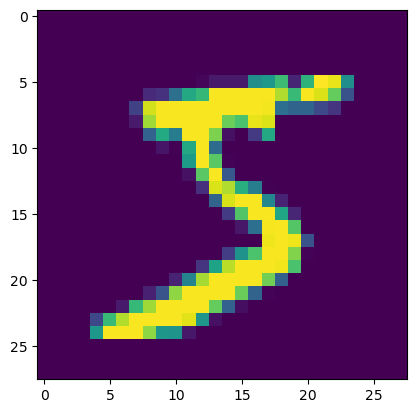

tensor(5)


In [38]:
import matplotlib.pyplot as plt
plt.imshow(X_train[0, :, :])
plt.show()
print(y_train[0])

Изменим размерности, чтобы выполнялось последующее матричное умножение:

In [39]:
X_train = X_train.reshape([-1, 28 * 28])
X_test = X_test.reshape([-1, 28 * 28])

Напишем класс для нейронной сети, она будет состоять из входного слоя с последующей функцией активации сигмоидой и входного слоя:

In [40]:
class MNISTNet(torch.nn.Module):
    def __init__(self, n_hidden_neurons):
        super(MNISTNet, self).__init__()
        self.fc1 = torch.nn.Linear(28 * 28, n_hidden_neurons)
        self.ac1 = torch.nn.Sigmoid()
        self.fc2 = torch.nn.Linear(n_hidden_neurons, 10)
    
    def forward(self, x):
        x = self.fc1(x)
        x = self.ac1(x)
        x = self.fc2(x)
        return x

Создадим экземпляр класса со 100 нейронами на скрытом слое:

In [ ]:
mnist_net = MNISTNet(100)

Определим функцию потерь через кросс-энтропию, а в качестве оптимизатора возьмём Adam с шагом обучения 0,001.

In [41]:
loss = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(mnist_net.parameters(), lr=1.0e-3)

Обучим нашу нейронную сеть:

In [42]:
batch_size = 100

test_accuracy_history = []
test_loss_history = []

for epoch in range(100):
    order = np.random.permutation(len(X_train))
    
    for start_index in range(0, len(X_train), batch_size):
        optimizer.zero_grad()
        
        batch_indexes = order[start_index:start_index+batch_size]
        
        X_batch = X_train[batch_indexes] 
        y_batch = y_train[batch_indexes] 
        
        preds = mnist_net.forward(X_batch)
        
        loss_value = loss(preds, y_batch)
        loss_value.backward()
        
        optimizer.step()

    test_preds = mnist_net.forward(X_test)
    test_loss_history.append(loss(test_preds, y_test))
    
    accuracy = (test_preds.argmax(dim=1) == y_test).float().mean()
    test_accuracy_history.append(accuracy)
    print(accuracy)

tensor(0.9127)
tensor(0.9186)
tensor(0.9204)
tensor(0.9214)
tensor(0.9232)
tensor(0.9250)
tensor(0.9279)
tensor(0.9301)
tensor(0.9241)
tensor(0.9303)
tensor(0.9330)
tensor(0.9307)
tensor(0.9317)
tensor(0.9379)
tensor(0.9360)
tensor(0.9390)
tensor(0.9414)
tensor(0.9416)
tensor(0.9405)
tensor(0.9365)
tensor(0.9375)
tensor(0.9422)
tensor(0.9442)
tensor(0.9441)
tensor(0.9376)
tensor(0.9395)
tensor(0.9411)
tensor(0.9384)
tensor(0.9414)
tensor(0.9422)
tensor(0.9423)
tensor(0.9461)
tensor(0.9446)
tensor(0.9440)
tensor(0.9467)
tensor(0.9482)
tensor(0.9452)
tensor(0.9476)
tensor(0.9468)
tensor(0.9449)
tensor(0.9518)
tensor(0.9505)
tensor(0.9453)
tensor(0.9480)
tensor(0.9463)
tensor(0.9464)
tensor(0.9469)
tensor(0.9444)
tensor(0.9471)
tensor(0.9495)
tensor(0.9476)
tensor(0.9495)
tensor(0.9498)
tensor(0.9519)
tensor(0.9518)
tensor(0.9493)
tensor(0.9511)
tensor(0.9508)
tensor(0.9535)
tensor(0.9503)
tensor(0.9507)
tensor(0.9489)
tensor(0.9518)
tensor(0.9525)
tensor(0.9552)
tensor(0.9541)
tensor(0.9

Выведем на экран значения точности и потерь:

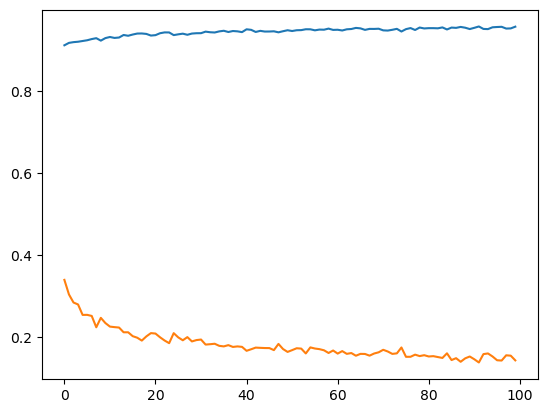

In [43]:
with ##WRITE YOUR CODE HERE:
    plt.plot(test_accuracy_history)
    plt.plot(test_loss_history)